## Importing lib

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn import impute
import numpy as np


## Loading dataset

In [5]:
train_df = pd.read_csv('data/train.csv', index_col = 'Id')
test_df = pd.read_csv('data/test.csv', index_col = 'Id')

- The data-set used here is the Kaggle home-prices dataset.

## Data insights

In [6]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [7]:
train_df.shape

(1460, 80)

In [8]:
test_df.shape

(1459, 79)

- The data-set consists of 79 features both numeric and categorical with 1460 training examples and 1459 test data

## Missing values in the features in train dataset

In [9]:
missing = train_df.isnull().sum()

In [10]:
missing = missing[missing > 0]

In [11]:
missing.sort_values(inplace = True)

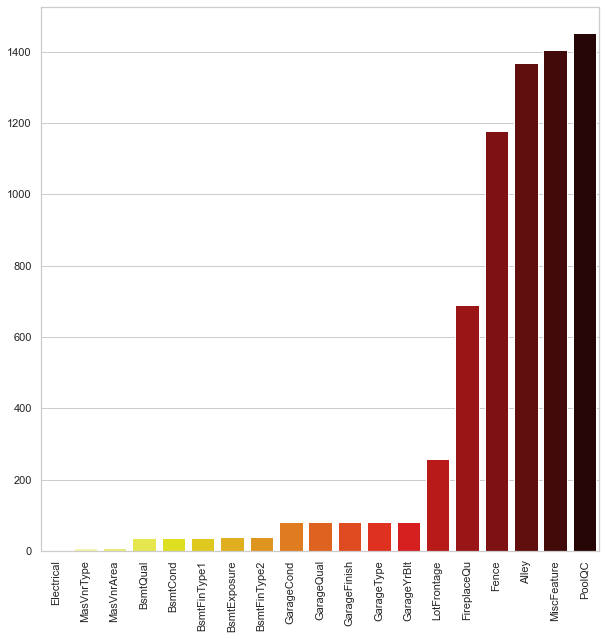

In [12]:
fig = plt.figure(figsize = (10,10))
sns.set(style = 'whitegrid')
ax = sns.barplot(x = missing.index.tolist(), y = missing, palette = 'hot_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

- We can see that the feature PoolQC is having around 90% missing data.
- It is then followed by MiscFeature, Alley, Fence etc.

## Feature segregation into numerical and categorical

In [13]:
features_numerical = train_df.select_dtypes(exclude = ['object']).drop(['SalePrice'], axis = 1).copy()

In [14]:
features_numerical.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [15]:
features_categorical = train_df.select_dtypes(include = ['object']).copy()
features_categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## Visualizations

##  Univariate distribution of features

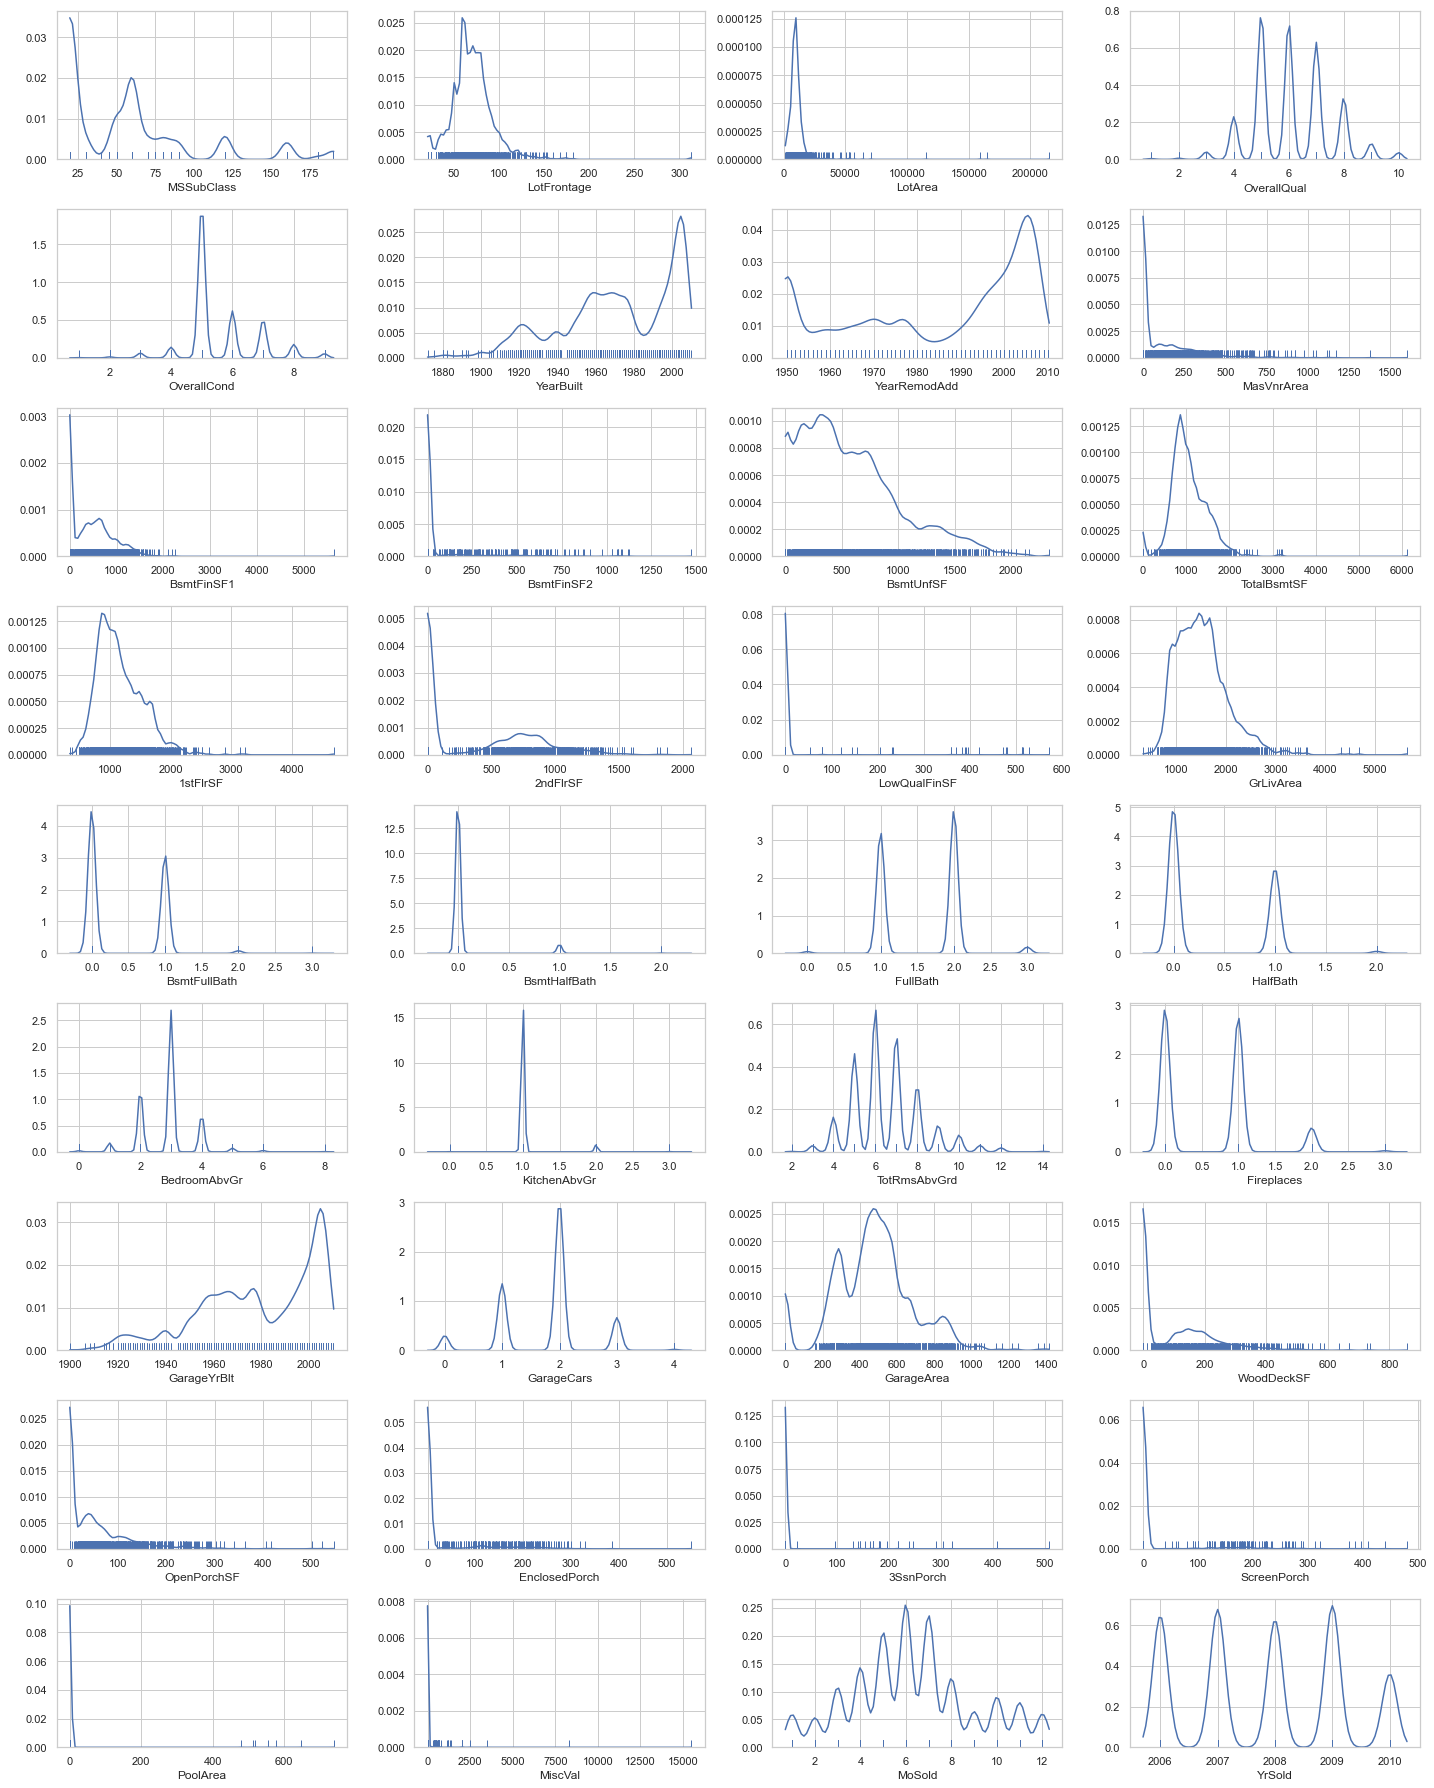

In [16]:
fig = plt.figure(figsize = (20,25))
sns.set(style = 'whitegrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.distplot(features_numerical.iloc[:,i].dropna(), rug = True, hist = False, kde_kws = {'bw':0.1}, color = 'b')
    plt.xlabel(features_numerical.columns[i])
plt.tight_layout()

## Univariate analysis using boxplot

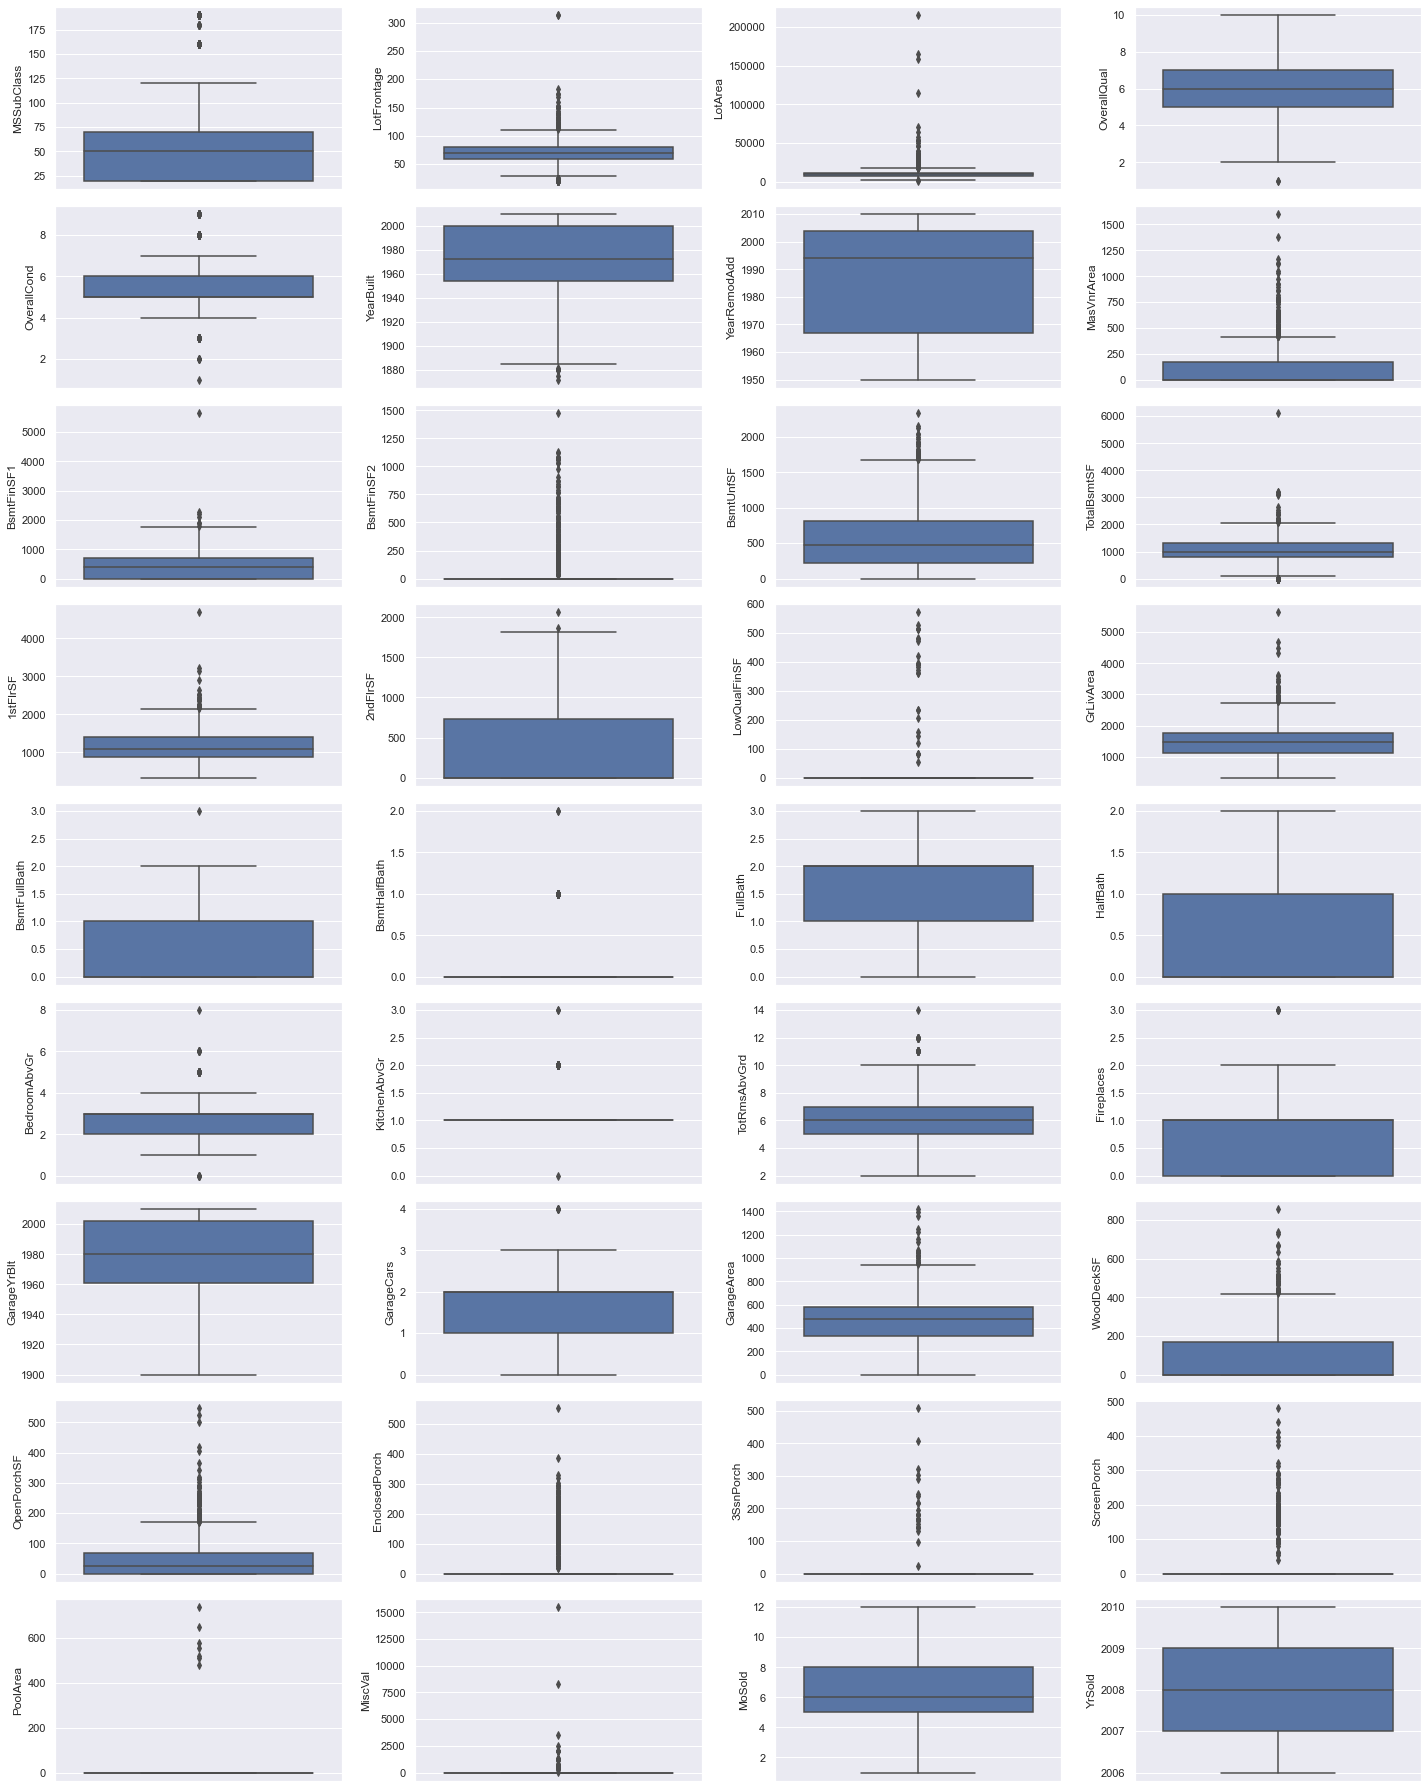

In [17]:
fig = plt.figure(figsize = (20,25))
sns.set(style = 'darkgrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y = features_numerical.iloc[:,i].dropna())
plt.tight_layout()

## Bivariate analysis using scatter plot

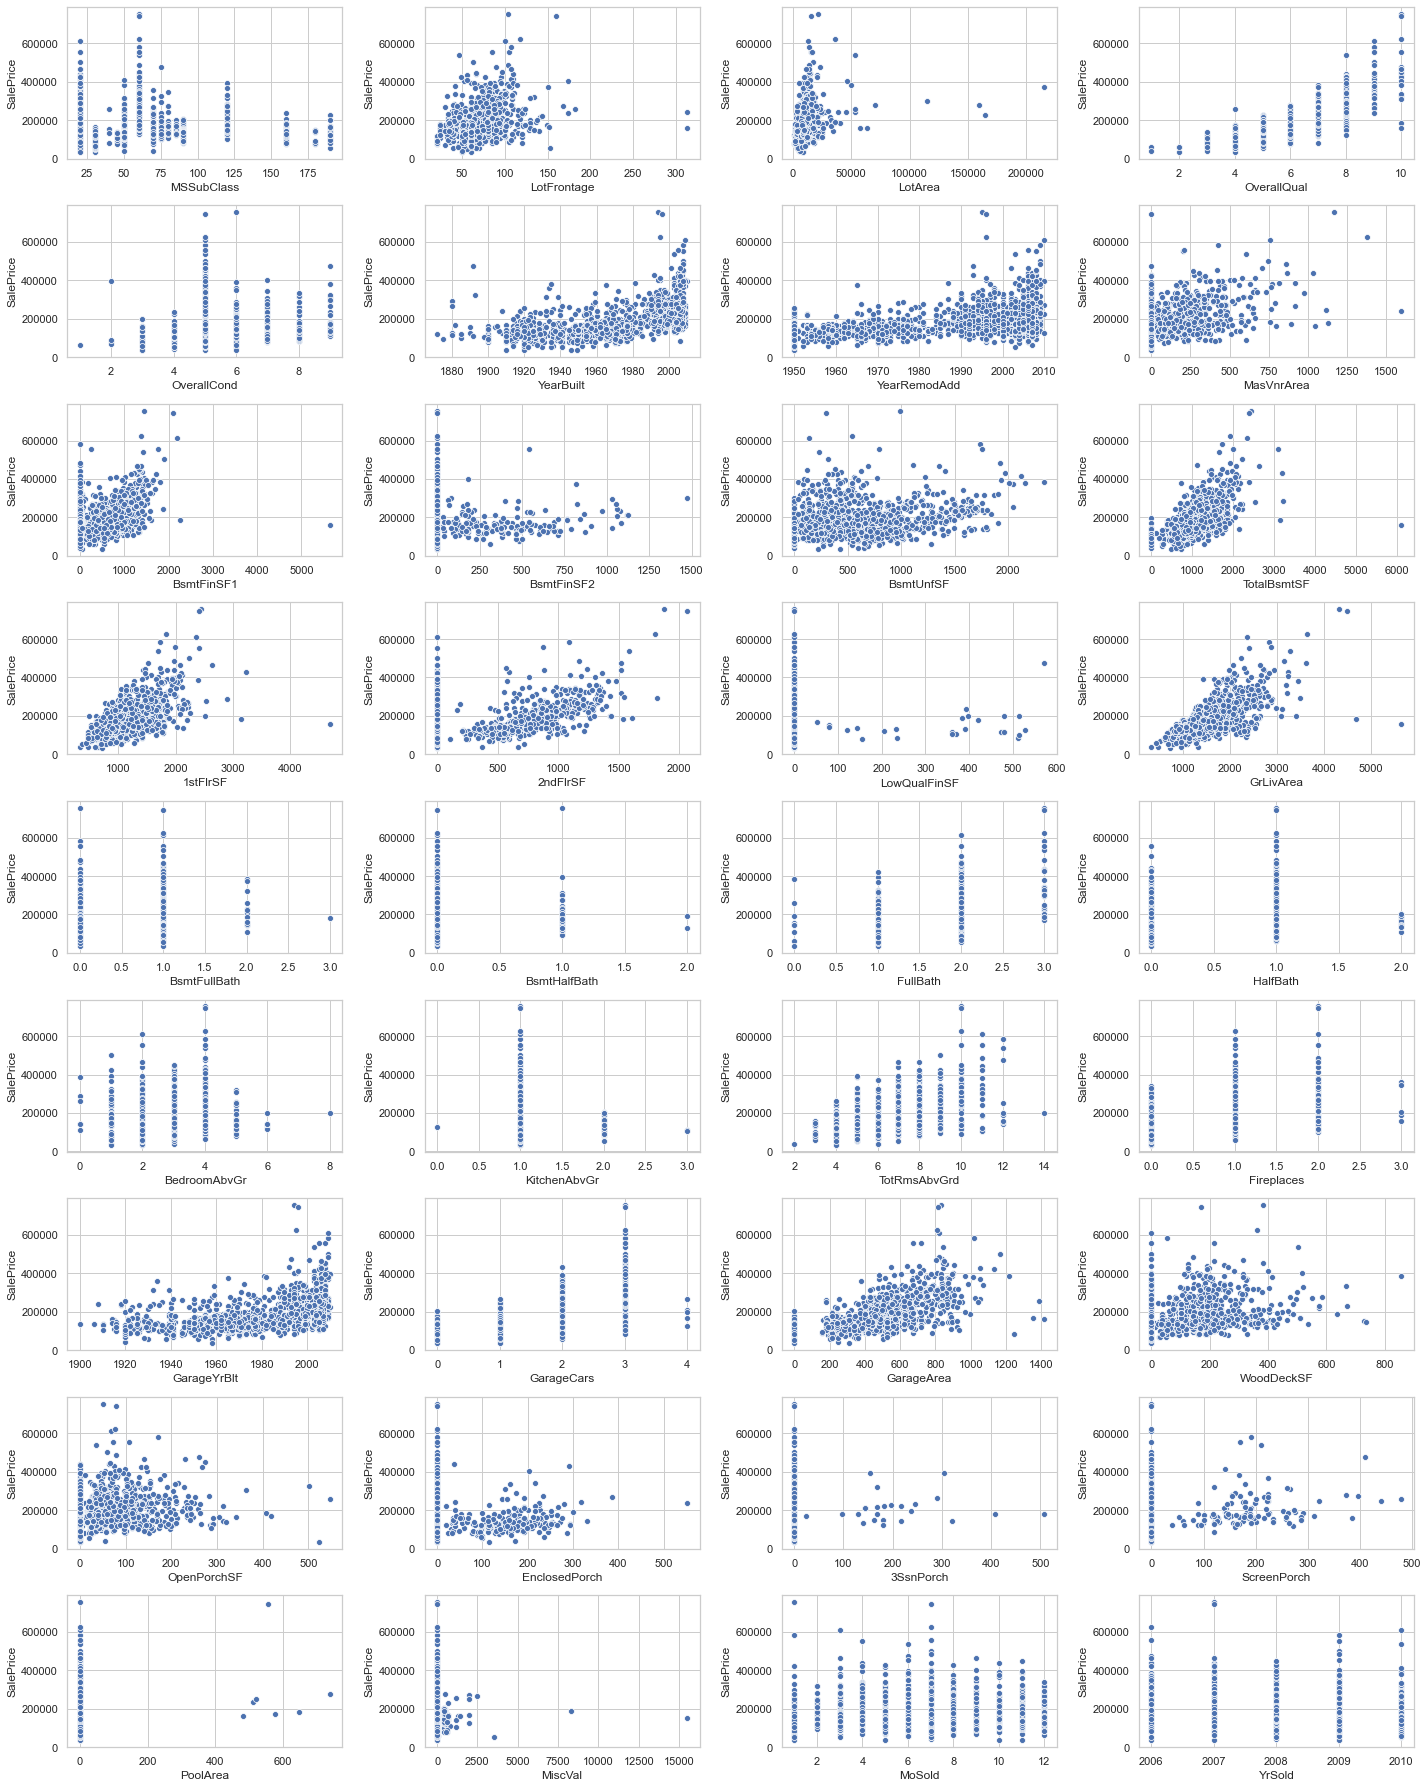

In [18]:
fig = plt.figure(figsize = (20,25))
sns.set(style = 'whitegrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.scatterplot(features_numerical.iloc[:,i].dropna(), train_df.SalePrice)
plt.tight_layout()

## Removing outliers

- From the above visualizations we can see that the below mentioned features have ouliers in them 

In [19]:
outliers = train_df[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
                    'LowQualFinSF', 'GrLivArea', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
                     'MiscVal']]

- We can verify it agin by plotting regression plots for each of these features.

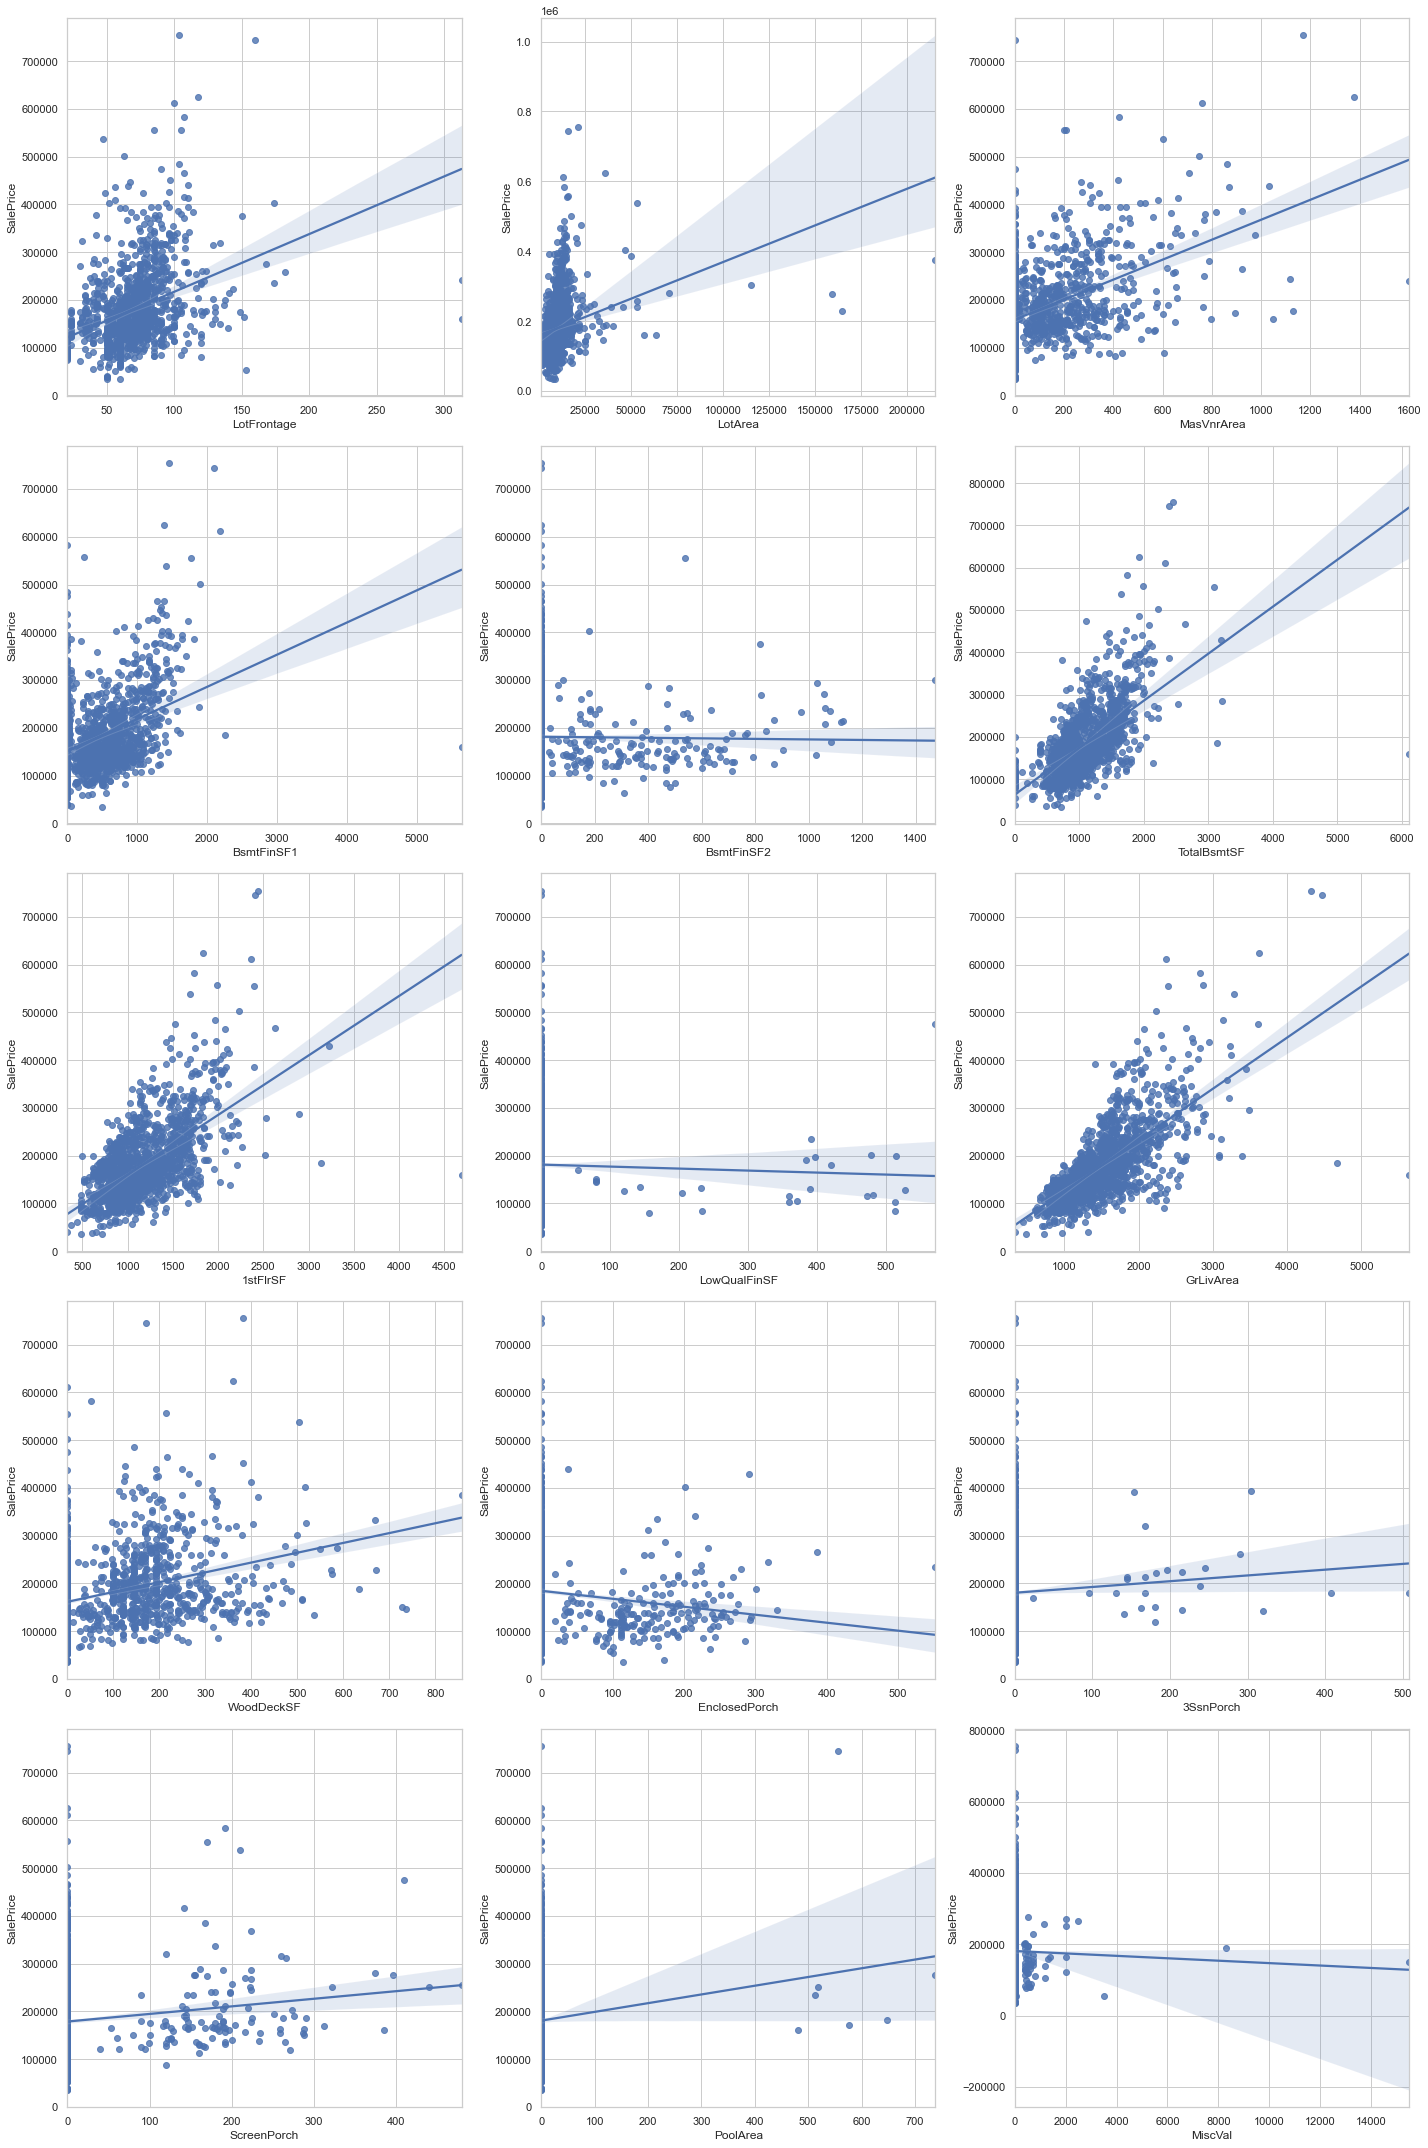

In [20]:
fig = plt.figure(figsize = (20,30))
for i in range(len(outliers.columns)):
    fig.add_subplot(5, 3, i+1)
    sns.regplot(outliers.iloc[:,i], train_df.SalePrice)
plt.tight_layout()

- Dropping the outliers by setting limits based on the above visualizations manually.

In [22]:
train_df.drop(train_df[train_df.LotFrontage > 200].index, inplace = True)
train_df.drop(train_df[train_df.LotArea > 100000].index, inplace = True)
train_df.drop(train_df[train_df.MasVnrArea > 1250].index, inplace = True)
train_df.drop(train_df[train_df.BsmtFinSF1 > 3000].index, inplace = True)
train_df.drop(train_df[train_df.BsmtFinSF2 > 1250].index, inplace = True)
train_df.drop(train_df[train_df.TotalBsmtSF > 4000].index, inplace = True)
train_df.drop(train_df[train_df['1stFlrSF'] > 4000].index, inplace = True)
train_df.drop(train_df[(train_df.LowQualFinSF > 500) & train_df.SalePrice > 600000].index, inplace = True)
train_df.drop(train_df[(train_df.GrLivArea > 4000) & (train_df.SalePrice < 200000)].index, inplace = True)
train_df.drop(train_df[train_df.WoodDeckSF > 800].index, inplace = True)
train_df.drop(train_df[train_df.EnclosedPorch > 400].index, inplace = True)
train_df.drop(train_df[train_df['3SsnPorch'] > 200].index, inplace = True)
train_df.drop(train_df[(train_df.ScreenPorch > 100) & (train_df.SalePrice > 450000)].index, inplace = True)
train_df.drop(train_df[train_df.PoolArea > 400].index, inplace = True)
train_df.drop(train_df[train_df.MiscVal > 5000].index, inplace = True)

## Dropping unnecessary features

- Highly correlated features can be dropped to avoid overfitting

In [23]:
correlation = train_df.select_dtypes(exclude = 'object').corr()

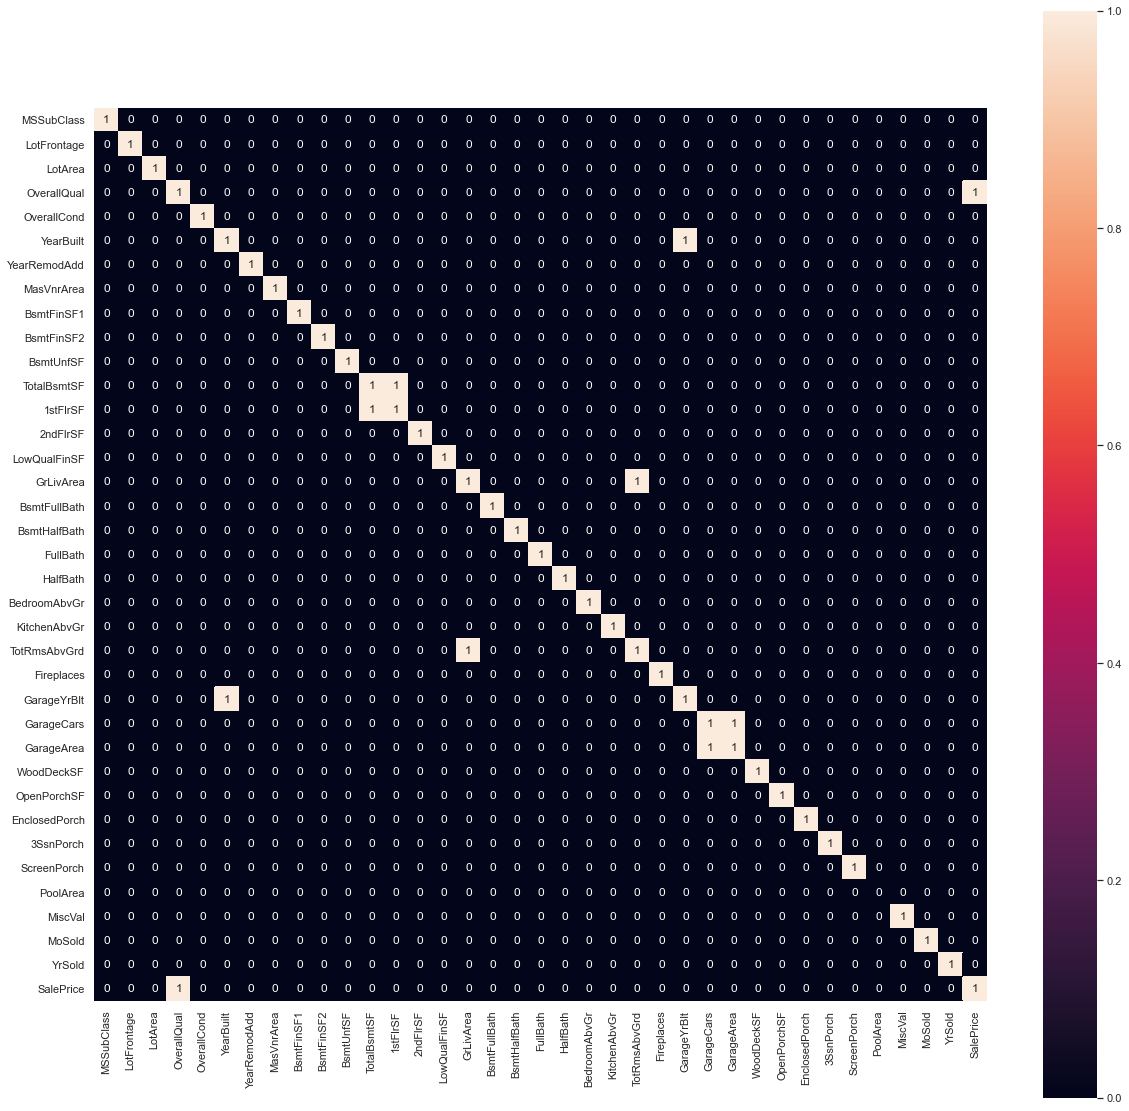

In [24]:
fig = plt.figure(figsize = (20,20))
sns.heatmap(correlation > 0.8, annot = True, square = True)

- The correlated features are found out. The ones that need to be dropped can be decided by its correlation with the target variable SalePrice.

In [25]:
correlation.SalePrice.sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.801493
GrLivArea        0.718996
GarageCars       0.647613
TotalBsmtSF      0.644541
GarageArea       0.634446
1stFlrSF         0.622300
FullBath         0.562614
YearBuilt        0.552223
YearRemodAdd     0.528484
TotRmsAbvGrd     0.524650
GarageYrBlt      0.508125
MasVnrArea       0.493222
Fireplaces       0.464076
BsmtFinSF1       0.392553
LotFrontage      0.360988
LotArea          0.332449
WoodDeckSF       0.329587
OpenPorchSF      0.322831
2ndFlrSF         0.296424
HalfBath         0.289755
BsmtUnfSF        0.230026
BsmtFullBath     0.220147
BedroomAbvGr     0.161515
ScreenPorch      0.069728
MoSold           0.051067
3SsnPorch        0.038210
BsmtHalfBath    -0.014339
YrSold          -0.023857
BsmtFinSF2      -0.038292
MiscVal         -0.048533
LowQualFinSF    -0.064357
OverallCond     -0.081193
MSSubClass      -0.085814
EnclosedPorch   -0.134095
KitchenAbvGr    -0.139927
PoolArea              NaN
Name: SalePrice, dtype: float64

- Dropping the features

In [26]:
train_df.drop(columns = ['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea'], axis = 1, inplace = True)

In [27]:
test_df.drop(columns = ['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea'], axis = 1, inplace = True)

-  Calculating the percentage missing values for the features

In [28]:
train_df.isnull().mean().sort_values(ascending = False).head()

PoolQC         1.000000
MiscFeature    0.966387
Alley          0.936975
Fence          0.809524
FireplaceQu    0.479692
dtype: float64

- The PoolWc feature is having 100% missing values
- MiscFeature follows with 96.6%
- I will be dropping all the featres having more than 90% missing values

In [29]:
train_df.drop(columns = ['PoolQC', 'MiscFeature', 'Alley'], axis = 1, inplace = True)

In [30]:
test_df.drop(columns = ['PoolQC', 'MiscFeature', 'Alley'], axis = 1, inplace = True)

- I have plotted the scatter plot once agaion to check for any features that is of not much use to us.

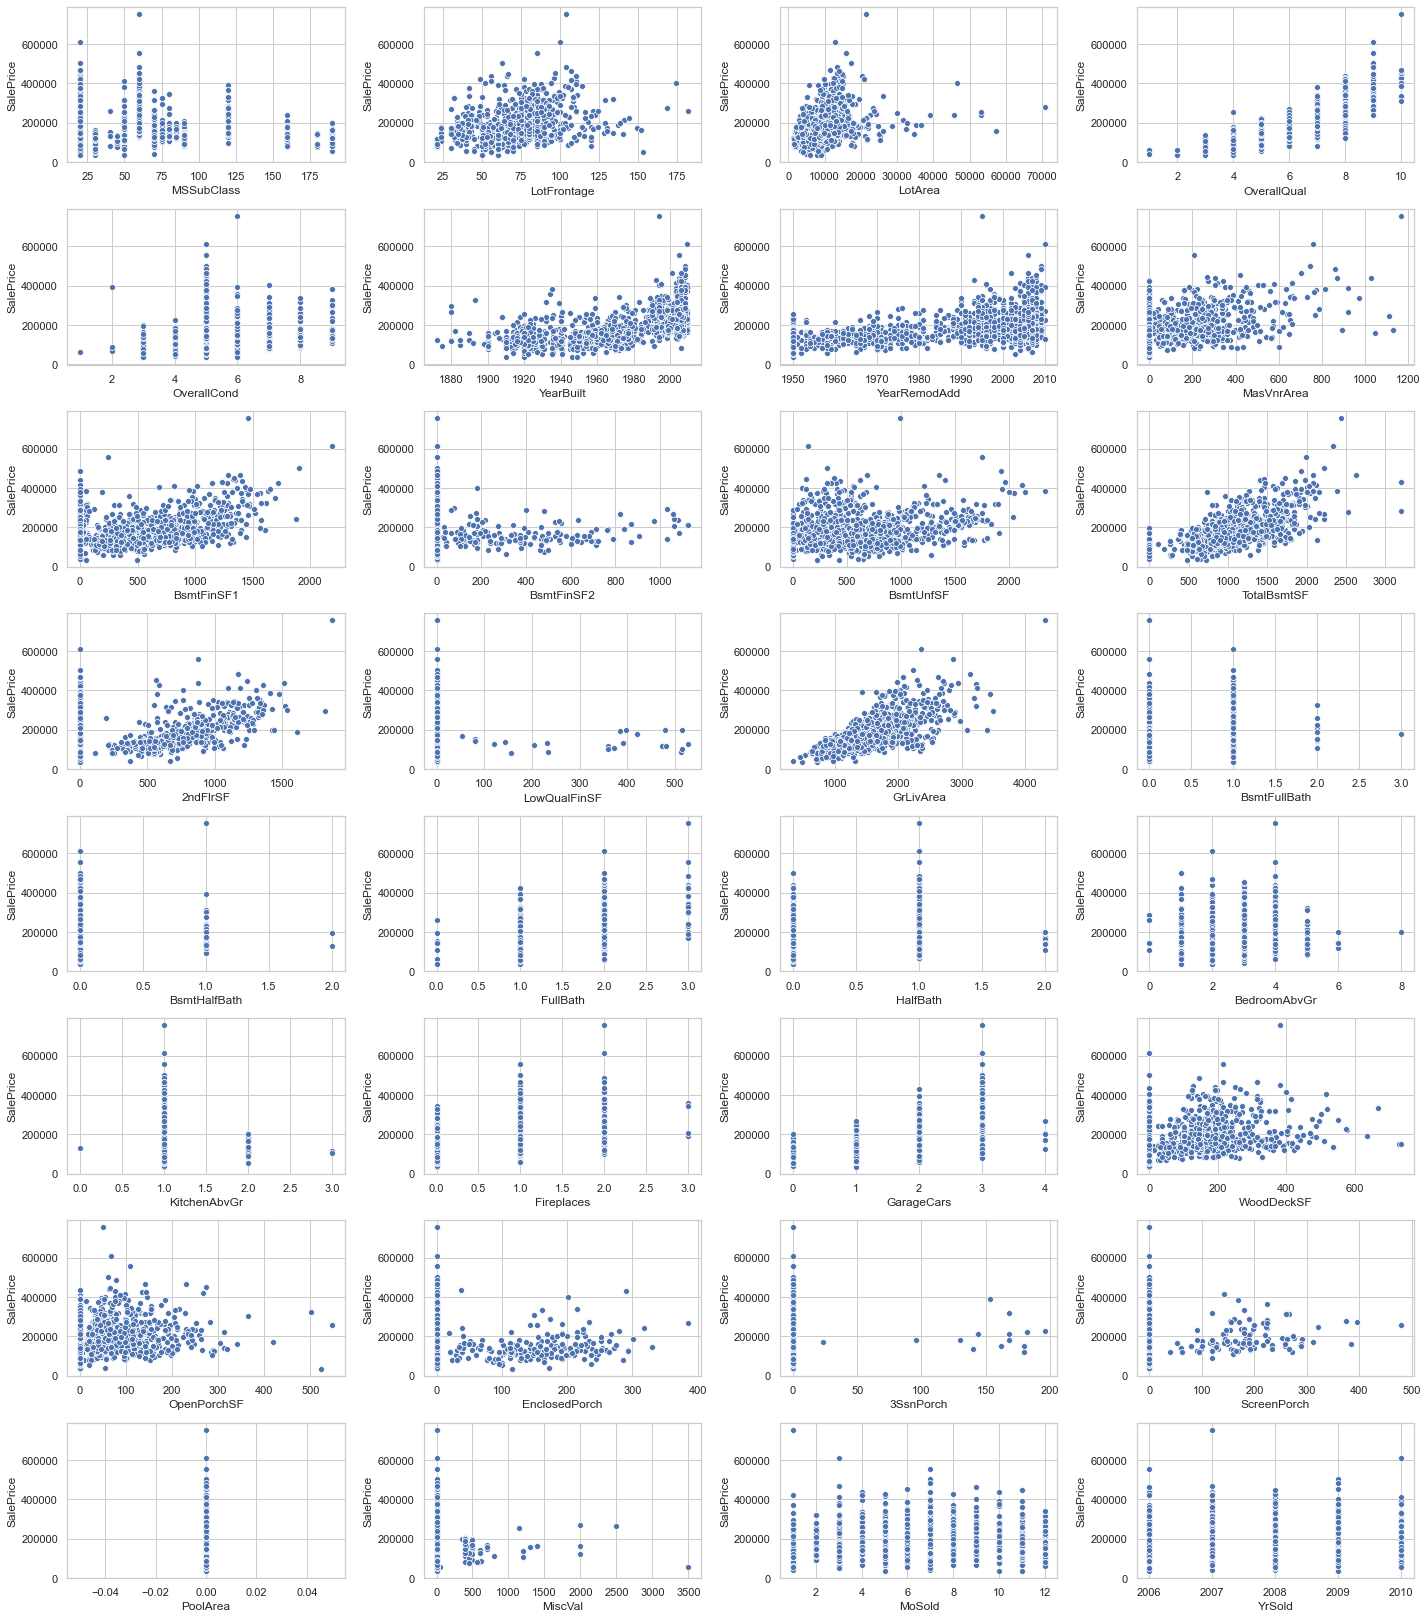

In [31]:
features_numerical = train_df.select_dtypes(exclude = ['object']).drop(['SalePrice'], axis = 1).copy()
fig = plt.figure(figsize = (20,25))
sns.set(style = 'whitegrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.scatterplot(features_numerical.iloc[:,i].dropna(), train_df.SalePrice)
plt.tight_layout()

- The feature PoolArea is having only 0 as its entry, so it is better to drop it.

In [32]:
train_df.drop(columns = ['PoolArea'], axis = 1, inplace = True)

In [33]:
test_df.drop(columns = ['PoolArea'], axis = 1, inplace = True)

- While droppping features make sure to drop it from both the train and test features.

## Replacing missing values in numerical features

- I am considering only numerical features initally

In [34]:
train_df.select_dtypes(exclude = 'object').isna().mean().sort_values(ascending = False).head()

LotFrontage    0.175070
MasVnrArea     0.005602
SalePrice      0.000000
YrSold         0.000000
LotArea        0.000000
dtype: float64

- I will be using sklearn's SimpleImputer to impute the missing values.

In [35]:
imp = impute.SimpleImputer()
train_df.LotFrontage = imp.fit_transform(np.array(train_df.LotFrontage).reshape(-1,1))

In [36]:
train_df.select_dtypes(exclude = 'object').isna().mean().sort_values(ascending = False).head()

MasVnrArea     0.005602
SalePrice      0.000000
YrSold         0.000000
LotFrontage    0.000000
LotArea        0.000000
dtype: float64

In [37]:
imp = impute.SimpleImputer()
train_df.MasVnrArea = imp.fit_transform(np.array(train_df.MasVnrArea).reshape(-1,1))

- Checking for any more missing values in the train dataset numerical features.

In [38]:
train_df.select_dtypes(exclude = 'object').isna().mean().sort_values(ascending = False)

SalePrice        0.0
YrSold           0.0
LotFrontage      0.0
LotArea          0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
MasVnrArea       0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
Fireplaces       0.0
GarageCars       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
MiscVal          0.0
MoSold           0.0
MSSubClass       0.0
dtype: float64

- Once we are done with train dataset we will be checking the test dataset numerical features.
- We will be using the same method used in the train dataset.

In [39]:
test_df.select_dtypes(exclude = 'object').isna().mean().sort_values(ascending = False)

LotFrontage      0.155586
MasVnrArea       0.010281
BsmtFullBath     0.001371
BsmtHalfBath     0.001371
GarageCars       0.000685
BsmtFinSF1       0.000685
BsmtFinSF2       0.000685
BsmtUnfSF        0.000685
TotalBsmtSF      0.000685
LowQualFinSF     0.000000
LotArea          0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
2ndFlrSF         0.000000
YrSold           0.000000
GrLivArea        0.000000
MoSold           0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
Fireplaces       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
MiscVal          0.000000
MSSubClass       0.000000
dtype: float64

In [40]:
imp = impute.SimpleImputer()
test_df.LotFrontage = imp.fit_transform(np.array(test_df.LotFrontage).reshape(-1,1))

In [41]:
imp = impute.SimpleImputer()
test_df.MasVnrArea = imp.fit_transform(np.array(test_df.MasVnrArea).reshape(-1,1))

In [42]:
test_df.select_dtypes(exclude = 'object').isna().mean().sort_values(ascending = False)

BsmtFullBath     0.001371
BsmtHalfBath     0.001371
GarageCars       0.000685
BsmtFinSF1       0.000685
BsmtFinSF2       0.000685
BsmtUnfSF        0.000685
TotalBsmtSF      0.000685
LowQualFinSF     0.000000
LotFrontage      0.000000
LotArea          0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
MasVnrArea       0.000000
2ndFlrSF         0.000000
YrSold           0.000000
GrLivArea        0.000000
MoSold           0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
Fireplaces       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
MiscVal          0.000000
MSSubClass       0.000000
dtype: float64

In [43]:
col = ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF']
for i in col:
    imp = impute.SimpleImputer()
    test_df[i] = imp.fit_transform(np.array(test_df[i]).reshape(-1,1))


In [44]:
test_df.select_dtypes(exclude = 'object').isna().mean().sort_values(ascending = False)

YrSold           0.0
GrLivArea        0.0
LotFrontage      0.0
LotArea          0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
MasVnrArea       0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
BsmtFullBath     0.0
MoSold           0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
Fireplaces       0.0
GarageCars       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
MiscVal          0.0
MSSubClass       0.0
dtype: float64

- We have done replacing all the missing values in the numeric features.

## Replacing missing values in categorical features

- We will be cheking the distribution of the categorical features first using countplot.

In [45]:
features_categorical = train_df.select_dtypes(include = 'object')
features_categorical.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

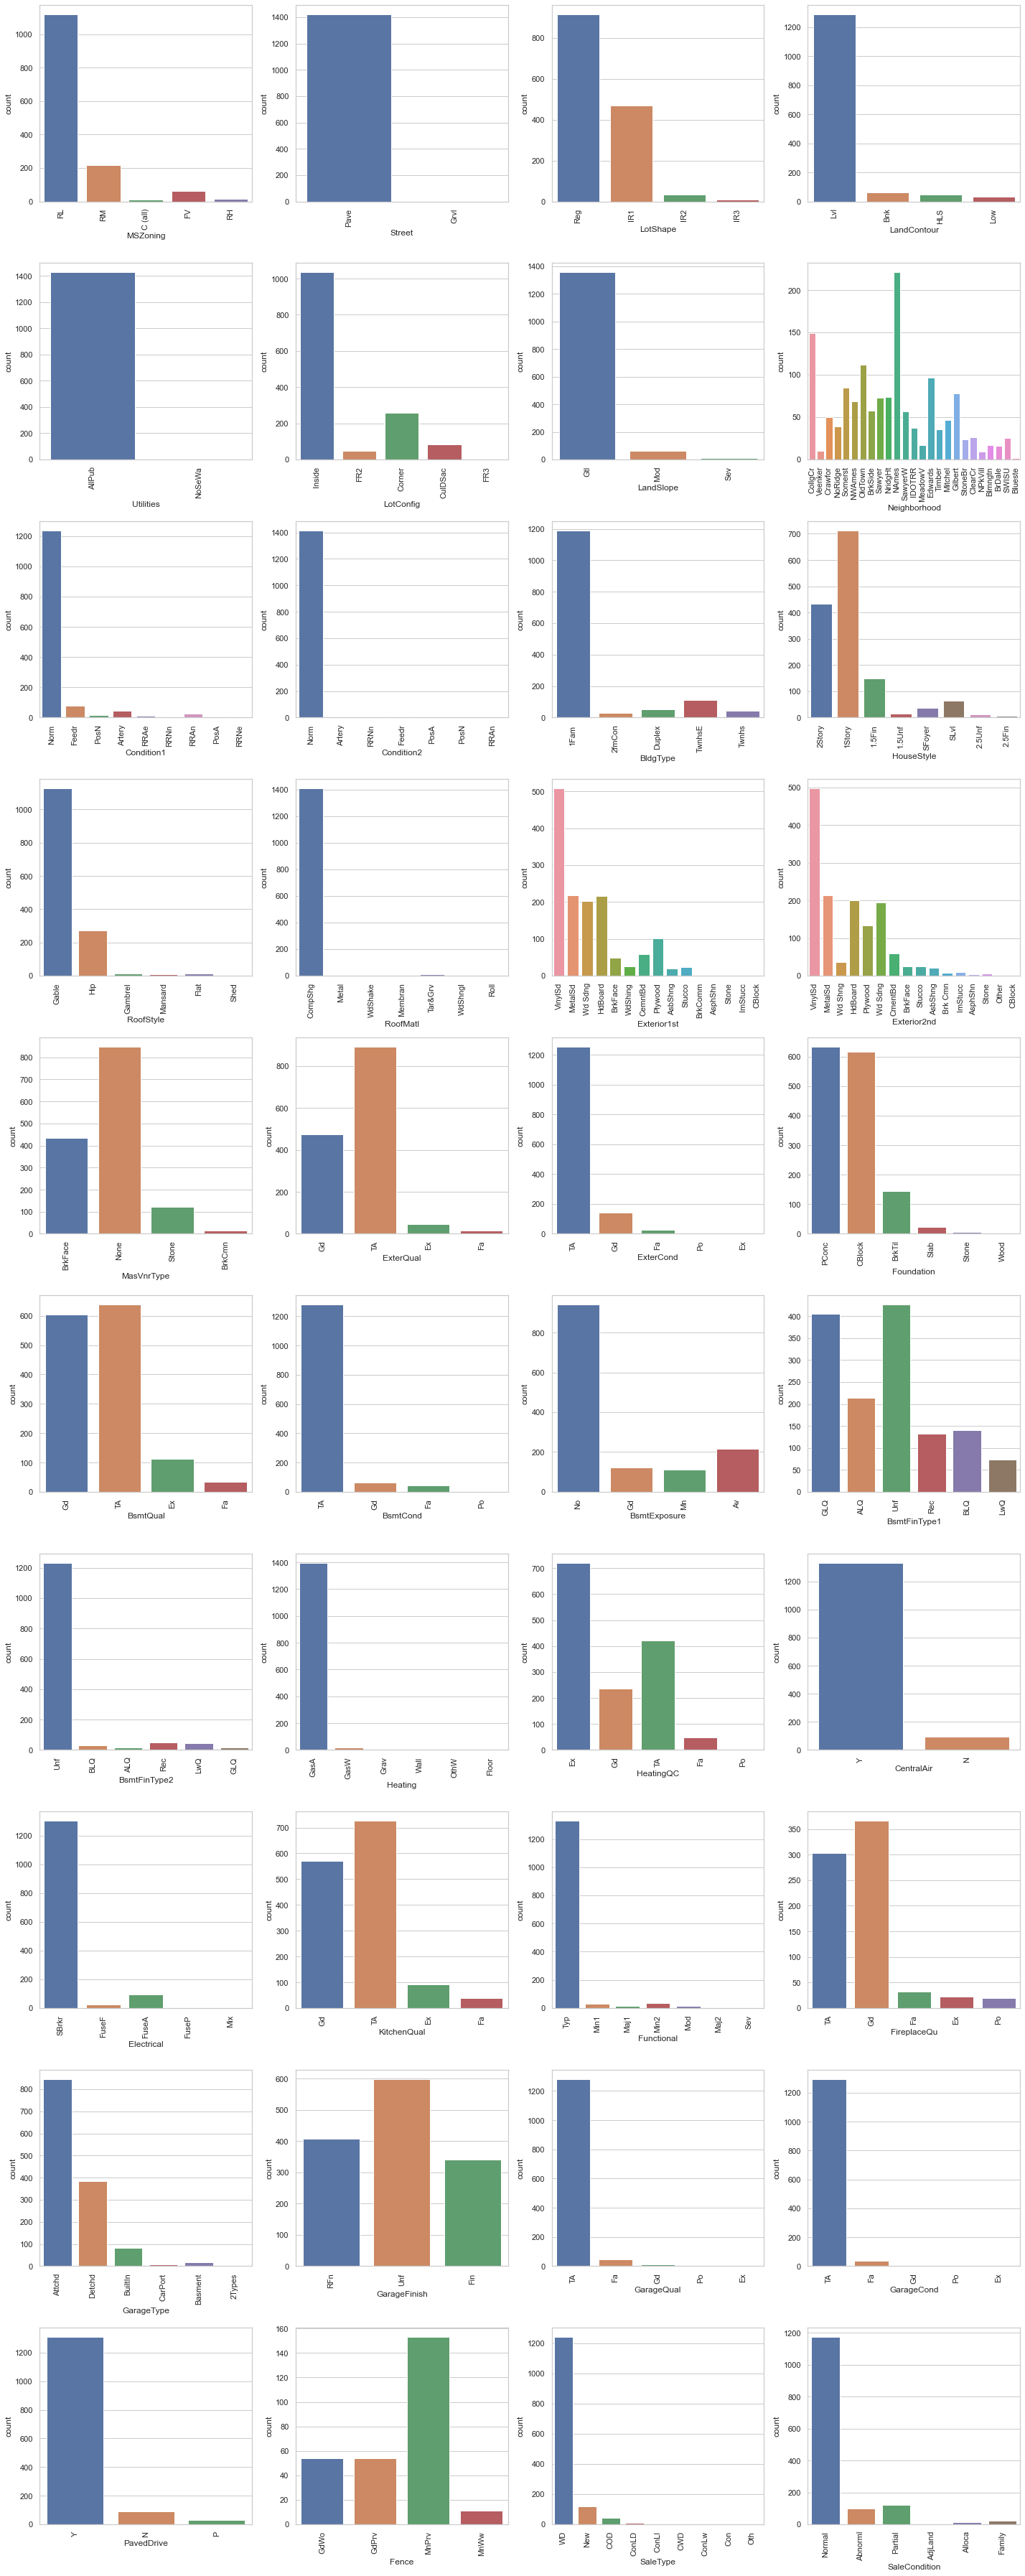

In [46]:
fig = plt.figure(figsize = (20,50))
for i in range(len(features_categorical.columns)):
    fig.add_subplot(10, 4, i+1)
    ax = sns.countplot(features_categorical.iloc[:,i].dropna())
    plt.xticks(rotation = 90)
plt.tight_layout()

- Checking the count of missing values

In [47]:
features_categorical.describe().T.freq.sort_values(ascending = False)

Utilities        1427
Street           1423
Condition2       1415
RoofMatl         1407
Heating          1397
LandSlope        1356
CentralAir       1333
Functional       1329
PavedDrive       1309
Electrical       1302
GarageCond       1295
LandContour      1289
GarageQual       1282
BsmtCond         1279
ExterCond        1256
SaleType         1240
Condition1       1238
BsmtFinType2     1233
BldgType         1190
SaleCondition    1174
RoofStyle        1126
MSZoning         1121
LotConfig        1035
BsmtExposure      940
LotShape          916
ExterQual         893
MasVnrType        849
GarageType        846
KitchenQual       726
HeatingQC         721
HouseStyle        713
BsmtQual          638
Foundation        634
GarageFinish      599
Exterior1st       508
Exterior2nd       497
BsmtFinType1      426
FireplaceQu       366
Neighborhood      221
Fence             153
Name: freq, dtype: object

- Utilities is having 1427 missing points followed by Street, Condition2 etc.
- I have decided to remove all the features having more than 1400 missing features as the total traing examples is 1428.
- I have included Heating as it contains 1397 missing values.

In [48]:
train_df.drop(columns = ['Utilities', 'Street', 'Condition2', 'RoofMatl'], axis = 1, inplace = True)
test_df.drop(columns = ['Utilities', 'Street', 'Condition2', 'RoofMatl'], axis = 1, inplace = True)

- Fill all the other feature's missing values by a new category called 'None'.

In [49]:
train_df.fillna('None', inplace = True)

In [50]:
train_df.select_dtypes(include = 'object').isna().mean().sort_values(ascending = False)

SaleCondition    0.0
SaleType         0.0
Foundation       0.0
ExterCond        0.0
ExterQual        0.0
MasVnrType       0.0
Exterior2nd      0.0
Exterior1st      0.0
RoofStyle        0.0
HouseStyle       0.0
BldgType         0.0
Condition1       0.0
Neighborhood     0.0
LandSlope        0.0
LotConfig        0.0
LandContour      0.0
LotShape         0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
FireplaceQu      0.0
Fence            0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageFinish     0.0
GarageType       0.0
Functional       0.0
BsmtFinType1     0.0
KitchenQual      0.0
Electrical       0.0
CentralAir       0.0
HeatingQC        0.0
Heating          0.0
BsmtFinType2     0.0
MSZoning         0.0
dtype: float64

- Do the same for test dataset.
- Check the percentage missing values for the features in test dataset.

In [51]:
test_df.select_dtypes(include = 'object').isna().mean().sort_values(ascending = False)

Fence            0.801234
FireplaceQu      0.500343
GarageCond       0.053461
GarageQual       0.053461
GarageFinish     0.053461
GarageType       0.052090
BsmtCond         0.030843
BsmtQual         0.030158
BsmtExposure     0.030158
BsmtFinType2     0.028787
BsmtFinType1     0.028787
MasVnrType       0.010966
MSZoning         0.002742
Functional       0.001371
Exterior2nd      0.000685
KitchenQual      0.000685
SaleType         0.000685
Exterior1st      0.000685
HouseStyle       0.000000
LotShape         0.000000
LandContour      0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
BldgType         0.000000
HeatingQC        0.000000
RoofStyle        0.000000
Heating          0.000000
PavedDrive       0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
Electrical       0.000000
CentralAir       0.000000
SaleCondition    0.000000
dtype: float64

In [52]:
test_df.fillna('None', inplace = True)

In [53]:
test_df.select_dtypes(include = 'object').isna().mean().sort_values(ascending = False)

SaleCondition    0.0
SaleType         0.0
Foundation       0.0
ExterCond        0.0
ExterQual        0.0
MasVnrType       0.0
Exterior2nd      0.0
Exterior1st      0.0
RoofStyle        0.0
HouseStyle       0.0
BldgType         0.0
Condition1       0.0
Neighborhood     0.0
LandSlope        0.0
LotConfig        0.0
LandContour      0.0
LotShape         0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
FireplaceQu      0.0
Fence            0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageFinish     0.0
GarageType       0.0
Functional       0.0
BsmtFinType1     0.0
KitchenQual      0.0
Electrical       0.0
CentralAir       0.0
HeatingQC        0.0
Heating          0.0
BsmtFinType2     0.0
MSZoning         0.0
dtype: float64

## Using sweetviz lib for automatic EDA
- sweetviz is the new EDA oriented lib that makes the whole job a lot easier.

In [ ]:
import sweetviz

In [55]:
train_df = pd.read_csv('data/train.csv', index_col = 'Id')
test_df = pd.read_csv('data/test.csv', index_col = 'Id')

- Creating a HTML report of both the datasets.

In [56]:
report = sweetviz.compare([train_df, 'Train'], [test_df, 'Test'], 'SalePrice')

:FEATURES DONE:                    |█████████████████████| [100%]   01:13  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:20  -> (00:00 left)


Creating Associations graph... DONE!


- Saving the HTML report in our directory.

In [57]:
report.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.
